# Numerical scheme sandbox for GPU-EPS Hav project

## Do initialization and define plot functions

In [1]:
#Lets have matplotlib "inline"
%pylab inline

#Lets have large and high-res figures
%config InlineBackend.figure_format = 'retina'
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_vars(xm, ym, B, Q):
    # Twice as wide as it is tall.
    fig = plt.figure(figsize=plt.figaspect(0.5))
    
    # First plot
    ax = fig.add_subplot(1, 1, 1, projection='3d')
 
    xxm, yym = np.meshgrid(xm, ym)
   
    surf = ax.plot_surface(xxm, yym, Q, rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)

    # Second plot
    ax.plot_wireframe(xxm, yym, B, rstride=1, cstride=1)

    plt.show()

def plot_vars_separate(xm, ym, B, Q):
    # Twice as wide as it is tall.
    fig = plt.figure(figsize=plt.figaspect(0.5))
    
    # First subplot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
 
    xxm, yym = np.meshgrid(xm, ym)
   
    surf = ax.plot_surface(xxm, yym, Q, rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)

    # Second subplot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_wireframe(xxm, yym, B, rstride=1, cstride=1)

    plt.show()

## Define initial conditions for experiments

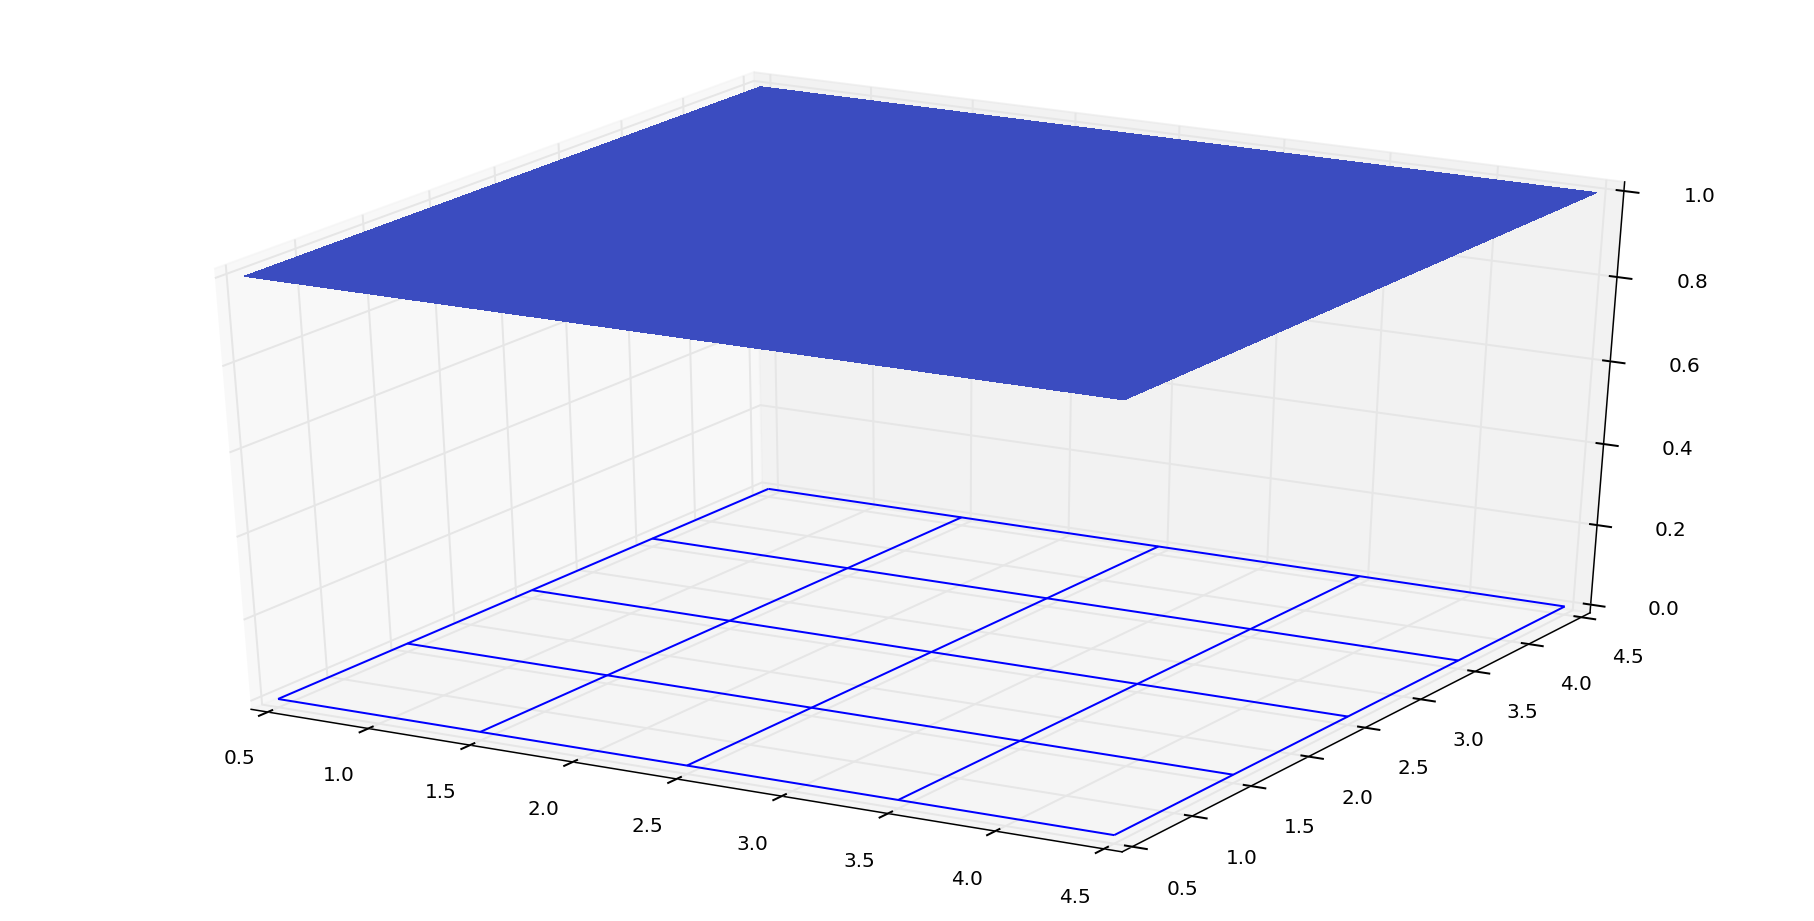

In [9]:
# Define our physical variables
x = np.linspace(0.0, 5.0, 6)
y = np.linspace(0.0, 5.0, 6)

# Cell midpoints
xm = np.linspace(0.5, 4.5, 5)
ym = np.linspace(0.5, 4.5, 5)

nx = len(x)
ny = len(y)
dx = 0.1
dy = 0.1
dt = 0.01
g = 9.81

# Bathymetry (not yet used in the following computations)
B = np.zeros([nx-1, ny-1]);

# Initial conditions
Q = np.ones([nx-1, ny-1]);

# Make sure that w (water depth) is non-negative initially
Q = np.maximum(Q, B)

plot_vars(xm, ym, B, Q)

## Run-through of numerical scheme (2D)

We implement a finite-difference based scheme on a Cartesian staggered grid.

Since the variables needs to be evaluated at a different location than they are stored, we do a reconstruction of the variables using (bi)linear interpolation.

First, we compute the depth-averaged velocity in the $x$-direction, U, at cell intersections:

Second, we compute the depth-averaged velocity in $y$-direction, V, at cell intersections:

Third, we compute the sea surface deviation, $\eta$, at cell centers:

Last, we evolve the solution in time, based on $U$, $V$, and $\eta$:

After a complete time step, boundary conditions are applied: